# Module 8 - ML, XAI, and data analytics

## Machine Learning - Neural Networks Data Classification

Neural Networks are one of the most powerfull techniques in Computer Science. They are computational systems vaguely inspired by the biological neural networks of animal brains.

The image shows two neurons connected with each other. In this image, we can identify three important properties:

- **Dendrites:** correspond to the input "wires" that receive sensory information. Dendrites are the segments of the neuron that receive stimulation in order for the cell to become active. They conduct electrical messages to the neuron cell body for the cell to function

- **Axon:** corresponds to the body of the neuron. It is a long slender projection of a nerve cell, or neuron, that conducts electrical impulses away from the neuron's cell body or soma.

- **Synapses:** correspond to the output "wires". When a nerve impulse reaches the synapse at the end of a neuron, it cannot pass directly to the next one. Instead, it triggers the neuron to release a chemical neurotransmitter. The neurotransmitter drifts across the gap between the two neurons.



<img src="./graphics/neuron.png" width=70% />

## Representations of a Neuron

A neuron is a computational unit that with three main layers:

- Input Layer

- Hidden Layer

- Output Layer




<img src="./graphics/model_NN.png" width=70% />




## Remember the Machine Learning Process:

<img src="./graphics/forecast.png" />

In [ ]:
#!pip install ann_visualizer
#!pip install sympy

In [1]:
import tensorflow as tf


# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform


# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
sns.set()

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import statistics as stat


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Auxiliary function to plot decision boundaries
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 100
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

## Using Learning Network with ReLu Activation



In workshop 2B, you had to classify a breast tumour dataset using Naive Bayes algorithm. In this task, you will do classify again the dataset, but using:

- (1) a neural network with the 'tanh' as the activation function (you can choose as many hidden layers as you want)
- (2) a deep neural network with the 'relu' activation function (you can choose as many hidden layers as you want)

In [3]:
# Let's revisit the breast cancer dataset

file_path = 'data/breast_data_simple.csv'
data = pd.read_csv( file_path )
data

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34
...,...,...,...
564,1,21.56,22.39
565,1,20.13,28.25
566,1,16.60,28.08
567,1,20.60,29.33


In [4]:
X = data[["radius_mean", "texture_mean"]]
y = data["diagnosis"]

n_features = X.columns.to_list()
n_outputs = y.unique()

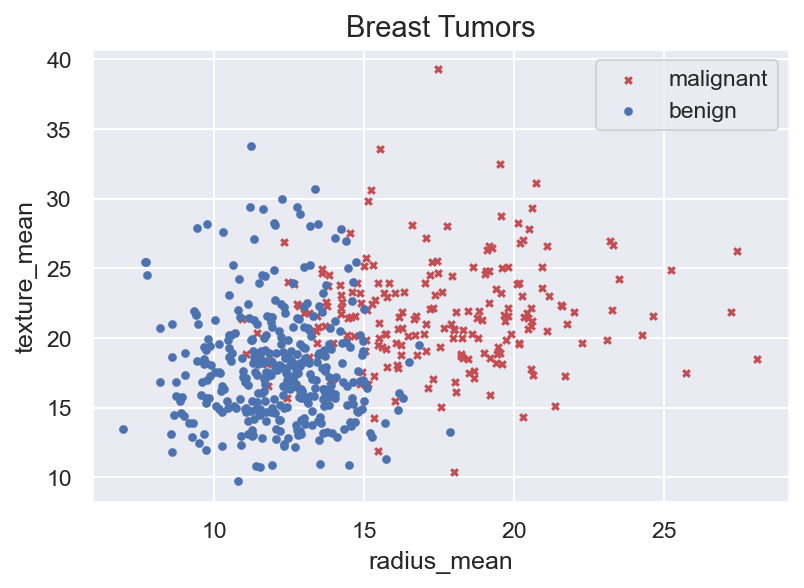

In [5]:
# for plotting purposes:
# separate the benign tumors (diagnosis = 0) from the malignant ones (diagnosis = 1)
malignant = data[ data[ 'diagnosis'] == 1]
benign = data[ data[ 'diagnosis'] == 0]

# need to convert dataframe into a matrix in order to make the plot work
x = X.to_numpy()

# plot figure
fig=plt.figure(dpi=150)

plt.scatter(malignant['radius_mean'], malignant['texture_mean'], c='r', marker='x', s=10, label='malignant', cmap='RdBu')
plt.scatter(benign['radius_mean'], benign['texture_mean'], c='b', marker='o', s=10, label='benign', cmap='RdBu')
plt.ylabel('texture_mean', fontsize=12)
plt.xlabel('radius_mean', fontsize=12)
plt.title('Breast Tumors', fontsize=14)
plt.legend()
plt.show()

In [6]:

# create numerical encoding for attribute species
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# separate the dataset into test set, validation set and train set
# YOUR CODE HERE:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 )
# create the training set and the test set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state = 42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state = 42)

In [8]:

# define the Machine Learning Model: Neural Network
# YOUR CODE HERE:
model_tum = Sequential()

# add the required layers
model_tum.add(Dense(10, input_dim= len(n_features), activation='relu'))

model_tum.add(Dense(7, activation='relu'))
model_tum.add(Dense(5, activation='relu'))
model_tum.add(Dense(3, activation='relu'))

model_tum.add(Dense(len(n_outputs), activation='softmax'))

# compile the network using: 
# the 'mean_squared_error' as a loss function
# the stochastic gradient descent ('sgd') as the optimization function
# and the 'accuracy' as evaluation metric
# YOUR CODE HERE:
model_tum.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# fit the model to the data -> learning the model
# YOUR CODE HERE:
# fit model
history = model_tum.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, verbose=1)


Train on 398 samples, validate on 86 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/sample - loss: 0.6881 - accuracy: 0.6709 - val_loss: 0.6811 - val_accuracy: 0.7093
Epoch 2/100
398/398 [==============================] - 0s 138us/sample - loss: 0.6816 - accuracy: 0.6558 - val_loss: 0.6703 - val_accuracy: 0.6977
Epoch 3/100
398/398 [==============================] - 0s 133us/sample - loss: 0.6736 - accuracy: 0.6357 - val_loss: 0.6586 - val_accuracy: 0.6977
Epoch 4/100
398/398 [==============================] - 0s 133us/sample - loss: 0.6642 - accuracy: 0.6432 - val_loss: 0.6448 - val_accuracy: 0.6977
Epoch 5/100
398/398 [==============================] - 0s 141us/sample - loss: 0.6520 - accuracy: 0.6508 - val_loss: 0.6270 - val_accuracy: 0.7209
Epoch 6/100
398/398 [==============================] - 0s 138us/sample - loss: 0.6371 - accuracy: 0.6809 - val_loss: 0.6093 - val_accuracy: 0.7674
Epoch 7/100
398/398 [==============================] - 0s 133us/sample - lo

In [9]:
# evaluate the model
# evaluate the model
_, train_acc = model_tum.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_tum.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


85/85 [==============================] - 0s 82us/sample - loss: 0.2143 - accuracy: 0.9176
Train: 0.899, Test: 0.918


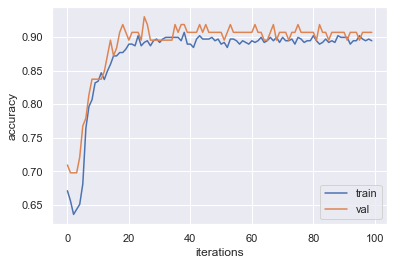

In [10]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

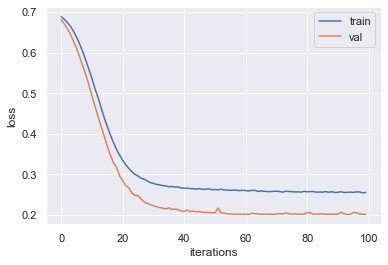

In [11]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.ylabel('loss', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()